In [51]:
import os
import subprocess
from subprocess import PIPE
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import requests

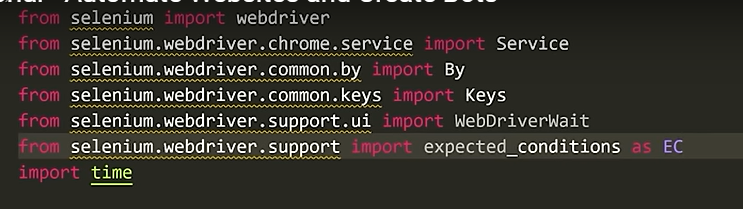

Here we get the links of different products

In [52]:
# service = webdriver.chrome.service.Service(executable_path="chromedriver.exe")
def get_n_elements(txt="utensils",n=10):
    driver = webdriver.Chrome()
    driver.get("https://www.amazon.in/")
    inp = driver.find_element(by=By.ID,value="twotabsearchtextbox")
    inp.clear()
    inp.send_keys(txt+Keys.ENTER)
    WebDriverWait(driver,5).until(
    EC.presence_of_element_located((By.ID,"twotabsearchtextbox"))
    )
    inp = driver.find_elements(By.CLASS_NAME,"a-link-normal")
    WebDriverWait(driver,5).until(
    EC.presence_of_all_elements_located((By.CLASS_NAME,"a-link-normal"))
    )
    k = set()
    links = []
    for x in inp:
        t = x.get_attribute('href')
        if ('sspa/click' in t) and x.text not in k:
            links.append({"url":t,"name":x.text,"type":txt})
            k.add(x.text)
            if len(k)>10:
                break
                    
    time.sleep(2)
    driver.quit()
    return links

In [54]:
helping = []
categories = [
    'utensils','furniture','laptops', 'watches','mobiles'
]
for x in categories:
    helping =  helping + get_n_elements(txt=x,n=10)

Productsare stored in file

In [55]:
import json
out_file = open('myfile.json','w')
json.dump(helping, out_file, indent = 6)
out_file.close()